In [12]:
%matplotlib inline

In [13]:
from pyshake.shakelib.source import Source
import numpy as np
import matplotlib.pyplot as plt
import StringIO
from openquake.hazardlib.gsim import base,abrahamson_2014
from openquake.hazardlib.geo import Mesh
from openquake.hazardlib.geo import point
from openquake.hazardlib.geo import utils
from openquake.hazardlib.geo.surface.planar import PlanarSurface
from mpl_toolkits.axes_grid1 import make_axes_locatable

In [14]:
def mycolorbar(mappable,ax=None,cax=None):
    # create an axes on the right side of ax. The width of cax will be 5%
    # of ax and the padding between cax and ax will be fixed at 0.05 inch.
    divider = make_axes_locatable(ax)
    cax = divider.append_axes("right", size="5%", pad=0.05)
    plt.colorbar(mappable,ax=ax, cax=cax)

In [15]:
def rotate(theta,x,y):
    rtheta = np.radians(theta)
    R = np.array([[np.cos(rtheta),-np.sin(rtheta)],
                  [np.sin(rtheta),np.cos(rtheta)]])
    xy = np.array([[x],[y]])
    xyp = np.dot(R,xy)
    xp,yp = xyp
    return (xp,yp)

31.350004 175.588346 5.0
31.701566 175.171250 5.0
32.003853 175.521321 205.0
31.652781 175.940347 205.0
31.350004 175.588346 5.0



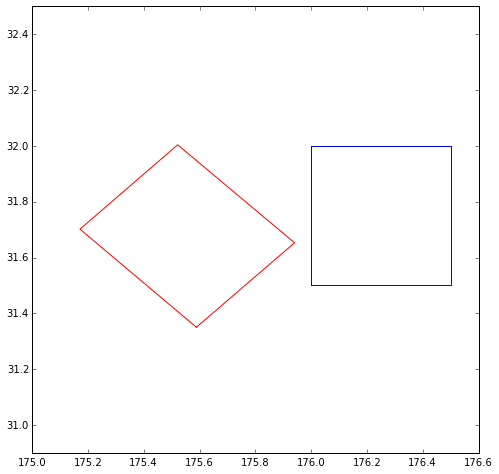

In [16]:
south = 30.0
north = 32.0
west = 175.5
east = 176.5
proj = utils.get_orthographic_projection(west,east,north,south)
P0 = point.Point(176.0,31.5,5.0)
P1 = point.Point(176.0,32.0,5.0)
P2 = point.Point(176.5,32.0,205.0)
P3 = point.Point(176.5,31.5,205.0)
p0x,p0y = proj(P0.longitude,P0.latitude)
p1x,p1y = proj(P1.longitude,P1.latitude)
p2x,p2y = proj(P2.longitude,P2.latitude)
p3x,p3y = proj(P3.longitude,P3.latitude)
p0xp,p0yp = rotate(45,p0x,p0y)
p1xp,p1yp = rotate(45,p1x,p1y)
p2xp,p2yp = rotate(45,p2x,p2y)
p3xp,p3yp = rotate(45,p3x,p3y)
P0Plon,P0Plat = proj(p0xp,p0yp,reverse=True)
P1Plon,P1Plat = proj(p1xp,p1yp,reverse=True)
P2Plon,P2Plat = proj(p2xp,p2yp,reverse=True)
P3Plon,P3Plat = proj(p3xp,p3yp,reverse=True)
newP0 = point.Point(P0Plon,P0Plat,P0.depth)
newP1 = point.Point(P1Plon,P1Plat,P1.depth)
newP2 = point.Point(P2Plon,P2Plat,P2.depth)
newP3 = point.Point(P3Plon,P3Plat,P3.depth)
fig = plt.figure(figsize=(8,8))
plt.plot([P0.longitude,P1.longitude,P2.longitude,P3.longitude,P0.longitude],
         [P0.latitude,P1.latitude,P2.latitude,P3.latitude,P0.latitude],'b')
plt.hold(True)
plt.plot([newP0.longitude,newP1.longitude,newP2.longitude,newP3.longitude,newP0.longitude],
         [newP0.latitude,newP1.latitude,newP2.latitude,newP3.latitude,newP0.latitude],'r')
plt.axis('equal')
fmt = '%.6f %.6f %.1f\n%.6f %.6f %.1f\n%.6f %.6f %.1f\n%.6f %.6f %.1f\n%.6f %.6f %.1f\n'
fault_text = fmt % (P0Plat,P0Plon,P0.depth,
                   P1Plat,P1Plon,P1.depth,
                   P2Plat,P2Plon,P2.depth,
                   P3Plat,P3Plon,P3.depth,
                   P0Plat,P0Plon,P0.depth)
print fault_text

In [17]:
# fault_text = """
# 30.0 175.5 5
# 32.0 175.5 5
# 32.0 176.5 205
# 30.0 176.5 205
# 30.0 175.5 5
# """
fault_text = """
# Source: Wald, D. J., T. H. Heaton, and K. W. Hudnut (1996). The Slip History of the 1994 Northridge, California, Earthquake Determined from Strong-Motion, Teleseismic, GPS, and Leveling Data, Bull. Seism. Soc. Am. 86, S49-S70.
34.315 -118.421 5.000
34.401 -118.587 5.000
34.261 -118.693 20.427
34.175 -118.527 20.427
34.315 -118.421 5.000
"""

event_text = """<?xml version="1.0" encoding="US-ASCII" standalone="yes"?>
<earthquake id="test" lat="34.213" lon="-118.537" mag="6.7" year="1994" month="01" day="17" hour="12" minute="30" second="55" timezone="GMT" depth="18.4" locstring="NORTHRIDGE" created="1211173621" otime="1210573681" type="" />
"""
source_text = """mech=RS"""
ffile = StringIO.StringIO(fault_text)
efile = StringIO.StringIO(event_text)
sfile = StringIO.StringIO(source_text)
source = Source.readFromFile(efile,faultfile=ffile,sourcefile=sfile)
gmpe = abrahamson_2014.AbrahamsonEtAl2014()
rupture = source.getRuptureContext(gmpe)
mapwidth = 3.0
latmin = rupture.hypo_lat - mapwidth
latmax = rupture.hypo_lat + mapwidth
lonmin = rupture.hypo_lon - mapwidth
lonmax = rupture.hypo_lon + mapwidth
dim = 0.02
lats = np.arange(latmin,latmax,dim)
lons = np.arange(lonmin,lonmax,dim)
lon,lat = np.meshgrid(lons,lats)
dep = np.zeros_like(lon)
mesh = Mesh(lon,lat,dep)
distances = source.getDistanceContext(gmpe,mesh)

Calculating method rx
Calculating method rjb
Calculating method ry0
Calculating method rrup


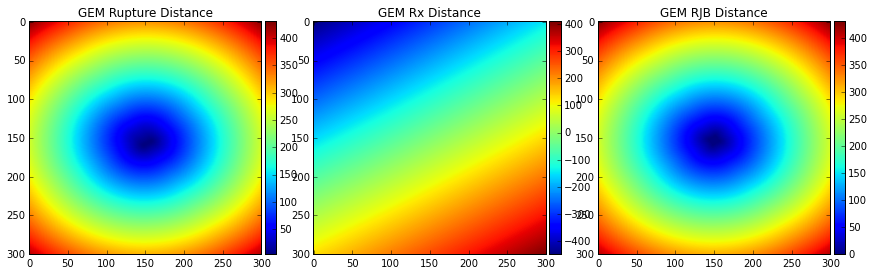

In [18]:
topLeft,topRight,bottomRight,bottomLeft = source.getQuadrilaterals()[0]
topRight.depth = topLeft.depth
bottomRight.depth = bottomLeft.depth
#bottomRight.latitude = topRight.latitude
#bottomRight.longitude = bottomLeft.longitude

ps = PlanarSurface.from_corner_points(0.02,topLeft,topRight,bottomRight,bottomLeft)
rupdist = ps.get_min_distance(mesh)
rjbdist = ps.get_joyner_boore_distance(mesh)
rxdist = ps.get_rx_distance(mesh)
#rydist = ps.get_ry0_distance(mesh)

fig,(ax1,ax2,ax3) = plt.subplots(nrows=1,ncols=3,figsize=(12,6))
fig.tight_layout()
map1 = ax1.imshow(rupdist);mycolorbar(map1,ax=ax1);
ax1.set_title('GEM Rupture Distance');

map2 = ax2.imshow(rxdist);mycolorbar(map2,ax=ax2);
ax2.set_title('GEM Rx Distance');

map3 = ax3.imshow(rjbdist);mycolorbar(map3,ax=ax3);
ax3.set_title('GEM RJB Distance');

# plt.figure(figsize=(8,8)),
# plt.imshow(rydist);plt.colorbar();
# plt.title('GEM Ry0 Distance');

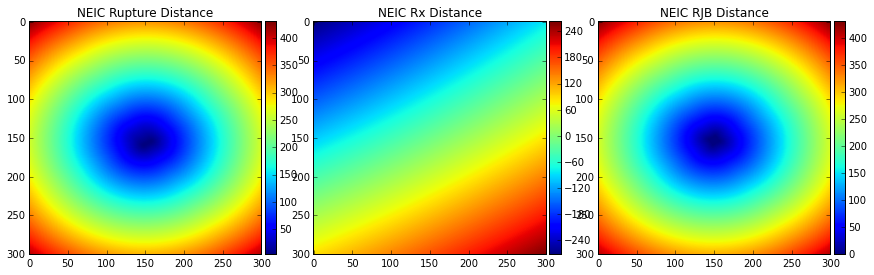

In [19]:
fig,(ax1,ax2,ax3) = plt.subplots(nrows=1,ncols=3,figsize=(12,6))
fig.tight_layout()
map1 = ax1.imshow(distances.rrup);mycolorbar(map1,ax=ax1);
ax1.set_title('NEIC Rupture Distance');

map2 = ax2.imshow(distances.rx);mycolorbar(map2,ax=ax2);
ax2.set_title('NEIC Rx Distance');

map3 = ax3.imshow(distances.rjb);mycolorbar(map3,ax=ax3);
ax3.set_title('NEIC RJB Distance');

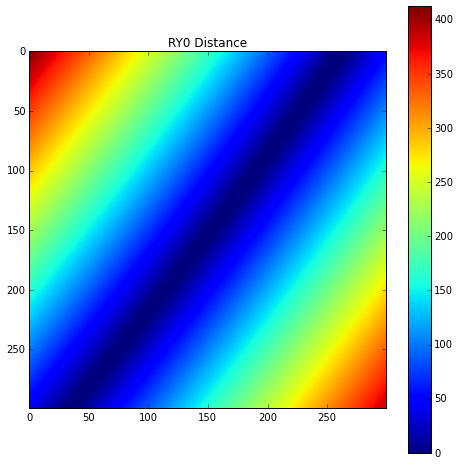

In [20]:
plt.figure(figsize=(8,8))
plt.imshow(distances.ry0)
plt.title('RY0 Distance')
plt.colorbar();

In [21]:
rupture = source.getRuptureContext(gmpe)
for key in rupture.__slots__:
    try:
        value = eval('rupture.%s' % key)
    except:
        print 'No value set for %s' % key
        continue
    print '%s = %s' % (key,str(value))

mag = 6.7
strike = 302.157773444
dip = 57.2506214069
rake = 90.0
ztor = 4.99999999988
hypo_lon = -118.537
hypo_lat = 34.213
hypo_depth = 18.4
width = 23.9408379429
No value set for hypo_loc
